In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

In [3]:
colors = ['#2a9d8f', '#2a9d8f', '#e76f51', '#e76f51', '#eba75f', '#eba75f', '#2f4f4f', '#2f4f4f']

In [13]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years_v2/'

In [14]:
detectors_ntw = ['ET_2L_15_cryo_45deg_2CE','ET_delta_10_cryo_2CE','ET_2L_15_cryo_45deg_1CE',
'ET_delta_10_cryo_1CE','ET_2L_15_cryo_45deg_LVKI','ET_2L_15_cryo_45deg','ET_delta_10_cryo_LVKI',
'ET_delta_10_cryo']

lbs_list = ['ET-2L+2CE', 'ET-$\Delta$+2CE', 'ET-2L+1CE', 'ET-$\Delta$+1CE',
'ET-2L+LVKI', 'ET-2L', 'ET-$\Delta$+LVKI', 'ET-$\Delta$']
				

lbs_old = ['network_SNR', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'err_mass_1', 
	   'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi', 'err_geocent_time', 'err_phase', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']
lbs = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 
       'theta_jn', 'psi', 'phase', 'geocent_time', 'lambda_1', 'lambda_2', 'redshift',
       'err_chirp_mass', 'err_mass_ratio', 'err_luminosity_disance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi','err_phase', 'err_geocent_time', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']

In [15]:
my_alpha = 0.1
my_linewidth = 1.5

In [16]:
eos = ['BLh_uniform', 'BLh_gaussian',
       'APR4_uniform', 'APR4_gaussian']
leg_titles = ['BLh - Uniform', 'BLh - Gaussian',
            'APR4 - Uniform', 'APR4 - Gaussian']

### [BLh, APR4]-EOS, redshift distribution, all networks, alpha=1

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_33473/3940884418.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=leg_titles[k], title_fontsize=22, frameon=False)


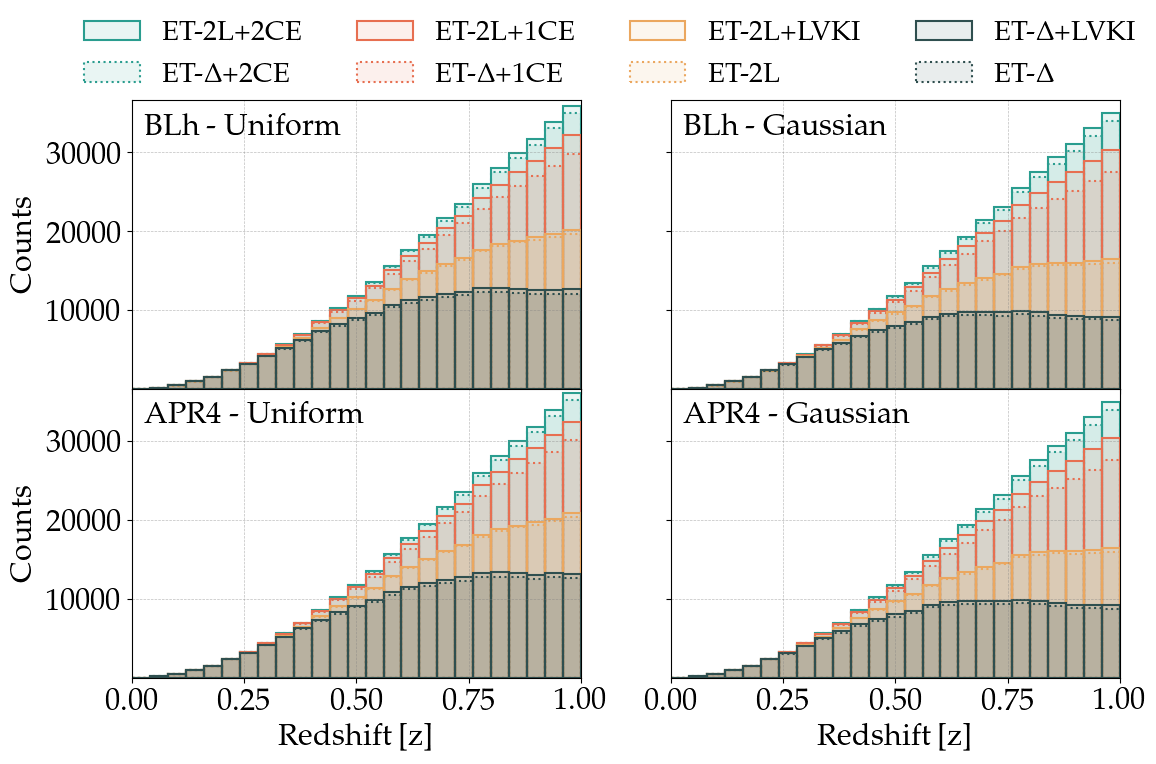

In [44]:
alpha = '1.0'
mpl.rc('xtick', labelsize = 22) 
mpl.rc('ytick', labelsize = 22)
# make a 2x2 plot comparing the 2 EOS and 2 mass models
fig, axs = plt.subplots(2, 2, figsize=(12.75, 7.5), sharex=True, sharey=True)

for i in range(2):
    for j in range(len(detectors_ntw)):
        data_in_uniform = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos[2*i]), 
                        str(detectors_ntw[j]), str(alpha), str(eos[2*i]), str(detectors_ntw[j])),
                        names = lbs, skiprows = 1, delimiter = ' ')
        data_in_gaussian = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos[2*i+1]), 
                        str(detectors_ntw[j]), str(alpha), str(eos[2*i+1]), str(detectors_ntw[j])),
                        names = lbs, skiprows = 1, delimiter = ' ')
        if j%2 == 0:
            my_linestyle = 'solid'
        else:
            my_linestyle = 'dotted'
        sns.histplot(data_in_uniform['redshift'], bins = 25, color = colors[j], alpha=my_alpha, 
                linestyle=my_linestyle, edgecolor=colors[j], linewidth=my_linewidth, ax=axs[i, 0])
        sns.histplot(data_in_gaussian['redshift'], bins = 25, color = colors[j], alpha=my_alpha, 
                linestyle=my_linestyle, edgecolor=colors[j], linewidth=my_linewidth, ax=axs[i, 1])

for k, ax in enumerate(axs.flat):
    ax.set_ylim(1, 36500)
    ax.set_xlabel(r'Redshift [z]', fontsize=22)
    ax.set_xlim(0, 1)
    ax.legend(title=leg_titles[k], title_fontsize=22, frameon=False)
    ax.grid(which = 'both', color = 'gray', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

axs[0, 0].set_ylabel(r'Counts', fontsize=22)
axs[1, 0].set_ylabel(r'Counts', fontsize=22)


fig.legend(lbs_list, loc='upper center', fontsize=20, ncols=4, bbox_to_anchor=(0.5, 1.02), frameon=False)
fig.subplots_adjust(hspace=0, wspace=0.2)
plt.savefig('plots/kn_detection_alpha%s.pdf' %alpha, bbox_inches='tight')
plt.show()

### [BLh, APR4]-EOS, redshift distribution, all networks, alpha=0.5

/var/folders/h7/9cf4n2f137zdvy422j_dnbcw0000gn/T/ipykernel_4950/3513809366.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=leg_titles[k], title_fontsize=18, frameon=False)


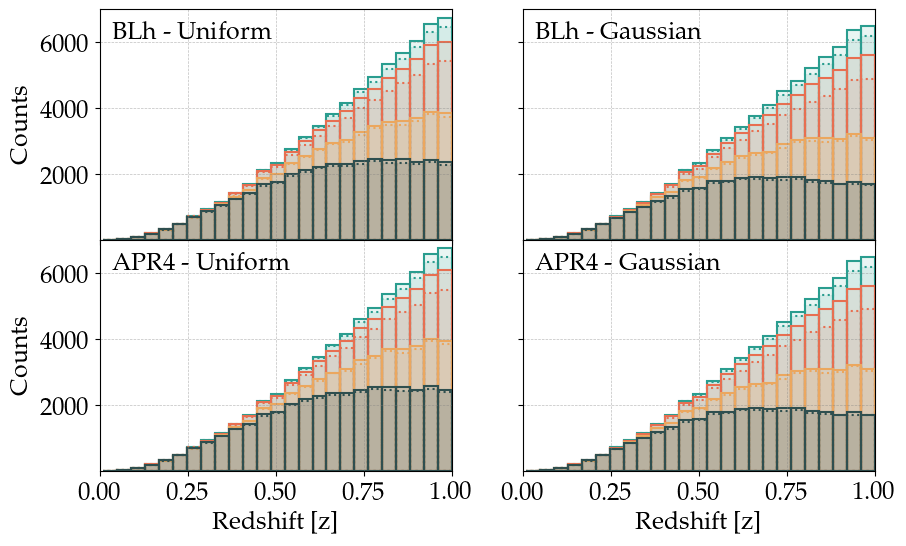

In [17]:
alpha = '0.5'
mpl.rc('xtick', labelsize = 18) 
mpl.rc('ytick', labelsize = 18)
# make a 2x2 plot comparing the 2 EOS and 2 mass models
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(len(detectors_ntw)):
        data_in_uniform = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos[2*i]), 
                        str(detectors_ntw[j]), str(alpha), str(eos[2*i]), str(detectors_ntw[j])),
                        names = lbs, skiprows = 1, delimiter = ' ')
        data_in_gaussian = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos[2*i+1]), 
                        str(detectors_ntw[j]), str(alpha), str(eos[2*i+1]), str(detectors_ntw[j])),
                        names = lbs, skiprows = 1, delimiter = ' ')
        if j%2 == 0:
            my_linestyle = 'solid'
        else:
            my_linestyle = 'dotted'
        sns.histplot(data_in_uniform['redshift'], bins = 25, color = colors[j], alpha=my_alpha, 
                linestyle=my_linestyle, edgecolor=colors[j], linewidth=my_linewidth, ax=axs[i, 0])
        sns.histplot(data_in_gaussian['redshift'], bins = 25, color = colors[j], alpha=my_alpha, 
                linestyle=my_linestyle, edgecolor=colors[j], linewidth=my_linewidth, ax=axs[i, 1])

for k, ax in enumerate(axs.flat):
    ax.set_ylim(1, 7000)
    ax.set_xlabel(r'Redshift [z]', fontsize=18)
    ax.set_xlim(0, 1)
    ax.legend(title=leg_titles[k], title_fontsize=18, frameon=False)
    ax.grid(which = 'both', color = 'gray', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

axs[0, 0].set_ylabel(r'Counts', fontsize=18)
axs[1, 0].set_ylabel(r'Counts', fontsize=18)


#fig.legend(lbs_list, loc='upper center', fontsize=16, ncols=4, bbox_to_anchor=(0.5, 1.02), frameon=False)
fig.subplots_adjust(hspace=0, wspace=0.2)
plt.savefig('plots/kn_detection_alpha%s.pdf' %alpha, bbox_inches='tight')
plt.show()